In [12]:
# adding ignore warning to clean the code
import warnings
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ignore all warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

import discotoolkit as dt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


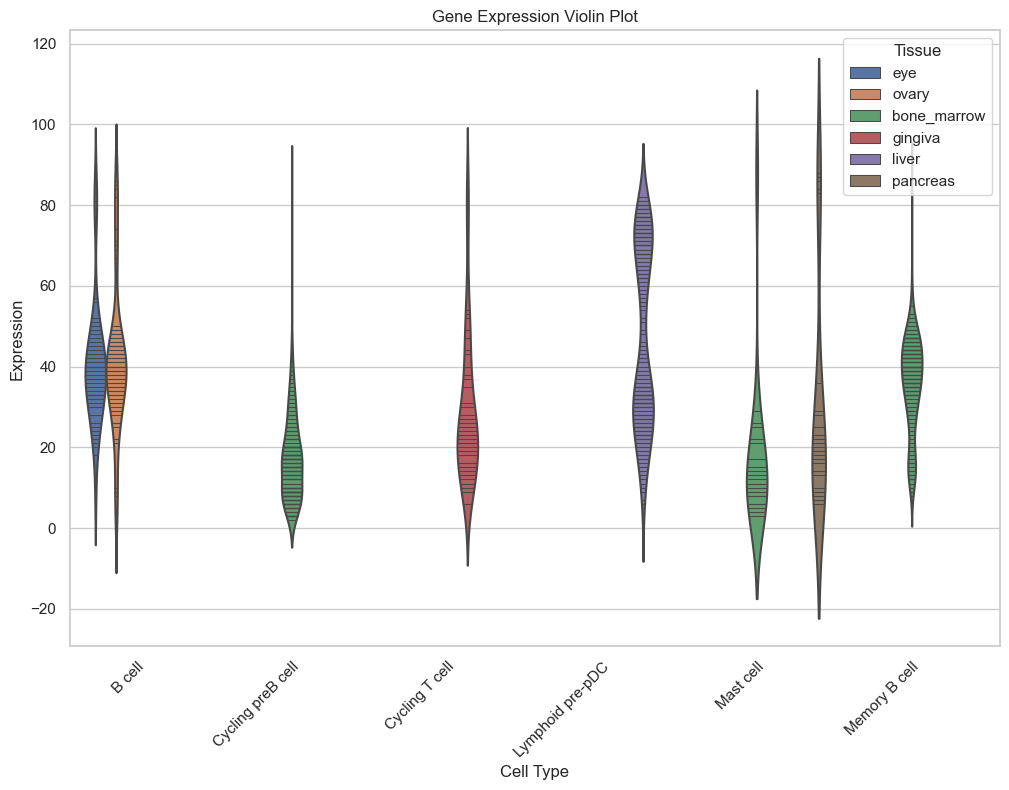

In [7]:
dt.plot_gene()

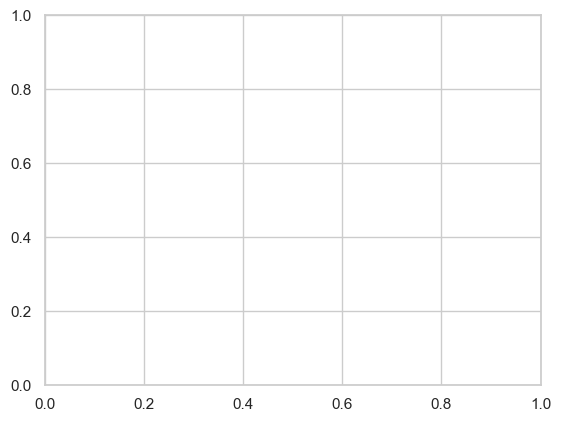

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


x = np.random.poisson(lam =3, size=100)
y = np.random.choice(["S{}".format(i+1) for i in range(6)], size=len(x))
df = pd.DataFrame({"Scenario":y, "LMP":x})

fig, axes = plt.subplots()

In [11]:
df[df.Scenario == 'S1']["LMP"].values

array([3, 5, 6, 1, 4, 0, 5, 2, 2, 4, 3])

In [19]:
url = f"https://www.immunesinglecell.org/api/vishuo/geneExp/getRefExp?gene=IGKC"
response = requests.get(url)
data = response.json()[:8]

# Extract relevant information from JSON data
expression_values = []
cell_types = []
tissues = []
combined = []

for entry in data:
    expression_values.append(np.array([float(val) for val in entry[0].split(";") if val]))
    cell_types.append(entry[1])
    tissues.append(entry[3])
    combined.append(cell_types + tissues)


In [41]:
sample_df = pd.DataFrame({"value": expression_values, "cell types": cell_types, "tissues": tissues})

sample_df = sample_df.explode("value")
sample_df["value"] = sample_df["value"].astype(int)
sample_df.head()

,value,cell types,tissues
0,8,B cell,eye
0,37,B cell,eye
0,22,B cell,eye
0,81,B cell,eye
0,20,B cell,eye


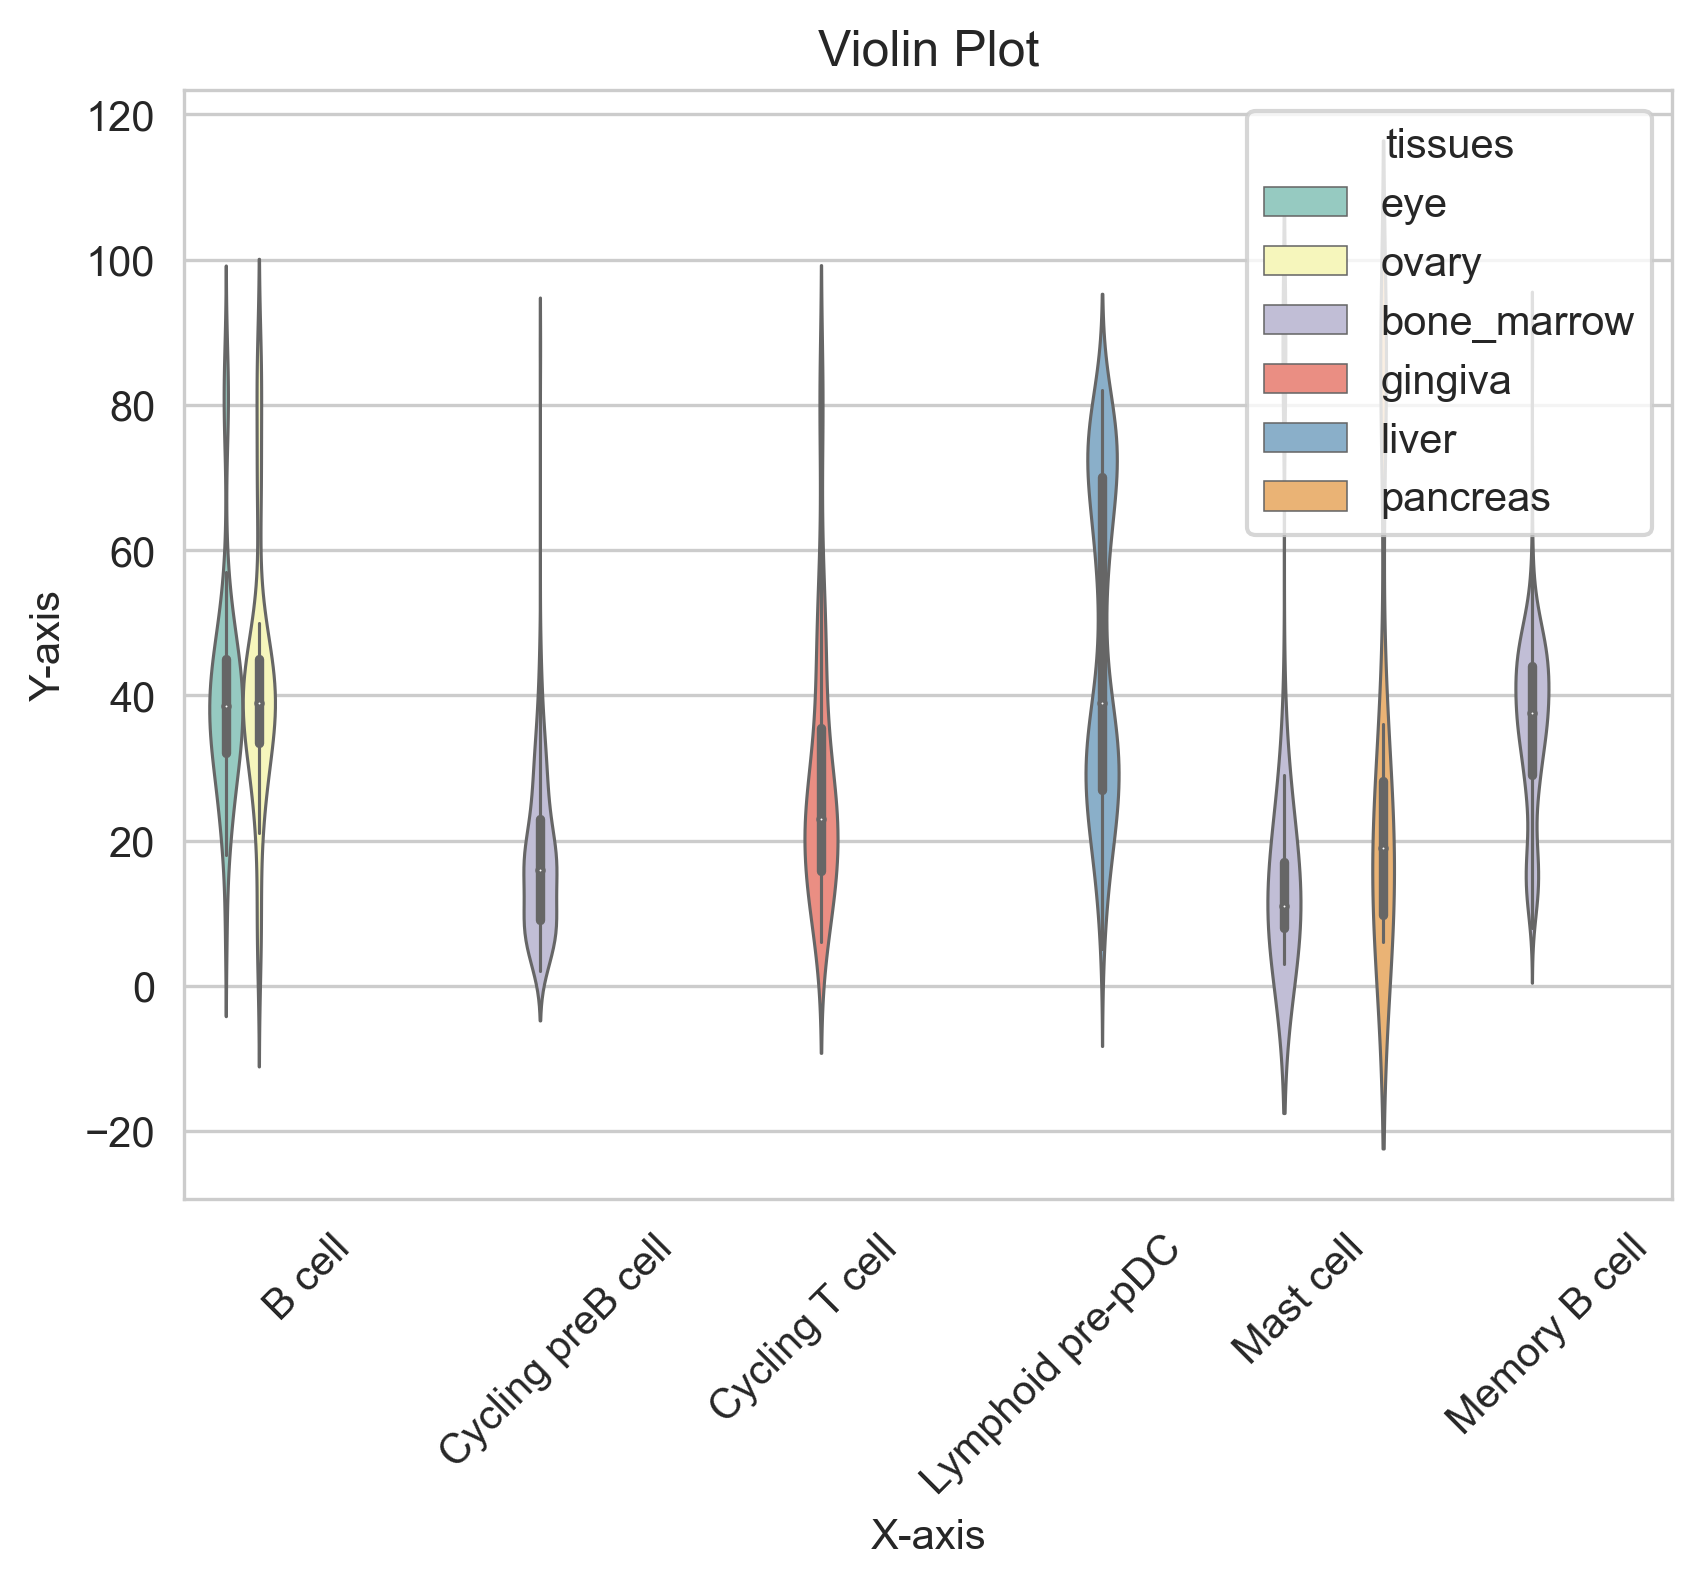

In [54]:
# Set DPI for plotting
dpi = 300  # Set the desired DPI value
plt.figure(dpi=dpi)

sns.set_style('whitegrid')  # Set the plot style
# Create the violin plot with different colors based on the 'Category' variable
sns.violinplot(data=sample_df, x='cell types', y='value', hue="tissues", palette='Set3', linewidth=0.75)

plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Violin Plot')

# Show the plot
plt.show()